# Imports

In [1]:
import requests
import re
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import dataframe_image as dfi
import matplotlib.pyplot as plt
from datetime import datetime
from bs4 import BeautifulSoup
from sqlalchemy import create_engine

# Data Collection

## Science Fiction Books 

In [2]:
#==============Requests and parameters================================

#parameters
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5),AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}

#url
url = 'https://books.toscrape.com/catalogue/category/books/science-fiction_16/index.html'

#request to url
page = requests.get(url, headers=headers)

#beautiful soup object
soup = BeautifulSoup(page.text, 'html.parser')

#==============product data================================
products = soup.find('ol', class_='row')
product_list = products.find_all('li', class_='col-xs-6 col-sm-4 col-md-3 col-lg-3')

#name
products = soup.find('ol', class_='row')
product_list = products.find_all('a')
product_name = [p.get('title') for p in product_list]
product_name = list(filter(None, product_name))
data_name = pd.DataFrame(product_name, columns = ['product_name'])

#rating
products = soup.find('ol', class_='row')
product_list = products.find_all('p', class_='star-rating')
product_rating = [p.get('class') for p in product_list]
rates = []

for i in range(len(product_rating)):
    rates.append(product_rating[i][1])
    
data_rate = pd.DataFrame(rates, columns=['product_rating'])

#price
products = soup.find('ol', class_='row')
product_list = products.find_all( 'p', class_='price_color' )
product_price = [p.get_text() for p in product_list]
data_price = pd.DataFrame(product_price, columns = ['product_price'])

#availability
products = soup.find('ol', class_='row')
product_list = products.find_all( 'p', class_='instock availability' )
product_availability = [p.get_text() for p in product_list]
data_availability = pd.DataFrame(product_availability, columns = ['product_availability'])

#science fiction dataframe
data_scifi = pd.DataFrame([product_name, product_price, rates, product_availability]).T
data_scifi.columns = ['product_name', 'product_price', 'product_rating', 'product_availability']

#category
data_scifi['product_category'] = 'Science Fiction'

#scrapy datetime
data_scifi['scrapy_datetime'] = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

## Classics Books 

In [3]:
#==============Requests and parameters================================

#parameters
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5),AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}

#url
url = 'https://books.toscrape.com/catalogue/category/books/classics_6/index.html'

#request to url
page = requests.get(url, headers=headers)

#beautiful soup object
soup = BeautifulSoup(page.text, 'html.parser')

#==============product data================================
products = soup.find('ol', class_='row')
product_list = products.find_all('li', class_='col-xs-6 col-sm-4 col-md-3 col-lg-3')

#name
products = soup.find('ol', class_='row')
product_list = products.find_all('a')
product_name = [p.get('title') for p in product_list]
product_name = list(filter(None, product_name))
data_name = pd.DataFrame(product_name, columns = ['product_name'])

#rating
products = soup.find('ol', class_='row')
product_list = products.find_all('p', class_='star-rating')
product_rating = [p.get('class') for p in product_list]
rates = []
for i in range(len(product_rating)):
    rates.append(product_rating[i][1])
    
data_rate = pd.DataFrame(rates, columns=['product_rating'])

#price
products = soup.find('ol', class_='row')
product_list = products.find_all( 'p', class_='price_color' )
product_price = [p.get_text() for p in product_list]
data_price = pd.DataFrame(product_price, columns = ['product_price'])

#availability
products = soup.find('ol', class_='row')
product_list = products.find_all( 'p', class_='instock availability' )
product_availability = [p.get_text() for p in product_list]
data_availability = pd.DataFrame(product_availability, columns = ['product_availability'])

#classics dataframe
data_classics = pd.DataFrame([product_name, product_price, rates, product_availability]).T
data_classics.columns = ['product_name', 'product_price', 'product_rating', 'product_availability']

#category
data_classics['product_category'] = 'Classics'

#scrapy datetime
data_classics['scrapy_datetime'] = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

## Humor Books 

In [4]:
#==============Requests and parameters================================

#parameters
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5),AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}

#url
url = 'https://books.toscrape.com/catalogue/category/books/humor_30/index.html'

#request to url
page = requests.get(url, headers=headers)

#beautiful soup object
soup = BeautifulSoup(page.text, 'html.parser')

#==============product data================================
products = soup.find('ol', class_='row')
product_list = products.find_all('li', class_='col-xs-6 col-sm-4 col-md-3 col-lg-3')

#name
products = soup.find('ol', class_='row')
product_list = products.find_all('a')
product_name = [p.get('title') for p in product_list]
product_name = list(filter(None, product_name))
data_name = pd.DataFrame(product_name, columns = ['product_name'])

#rating
products = soup.find('ol', class_='row')
product_list = products.find_all('p', class_='star-rating')
product_rating = [p.get('class') for p in product_list]
rates = []
for i in range(len(product_rating)):
    rates.append(product_rating[i][1])
    
data_rate = pd.DataFrame(rates, columns=['product_rating'])

#price
products = soup.find('ol', class_='row')
product_list = products.find_all( 'p', class_='price_color' )
product_price = [p.get_text() for p in product_list]
data_price = pd.DataFrame(product_price, columns = ['product_price'])

#availability
products = soup.find('ol', class_='row')
product_list = products.find_all( 'p', class_='instock availability' )
product_availability = [p.get_text() for p in product_list]
data_availability = pd.DataFrame(product_availability, columns = ['product_availability'])

#classics dataframe
data_humor = pd.DataFrame([product_name, product_price, rates, product_availability]).T
data_humor.columns = ['product_name', 'product_price', 'product_rating', 'product_availability']

#category
data_humor['product_category'] = 'Humor'

#scrapy datetime
data_humor['scrapy_datetime'] = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

## Business Books 

In [5]:
#==============Requests and parameters================================

#parameters
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5),AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}

#url
url = 'https://books.toscrape.com/catalogue/category/books/business_35/index.html'

#request to url
page = requests.get(url, headers=headers)

#beautiful soup object
soup = BeautifulSoup(page.text, 'html.parser')

#==============product data================================
products = soup.find('ol', class_='row')
product_list = products.find_all('li', class_='col-xs-6 col-sm-4 col-md-3 col-lg-3')

#name
products = soup.find('ol', class_='row')
product_list = products.find_all('a')
product_name = [p.get('title') for p in product_list]
product_name = list(filter(None, product_name))
data_name = pd.DataFrame(product_name, columns = ['product_name'])

#rating
products = soup.find('ol', class_='row')
product_list = products.find_all('p', class_='star-rating')
product_rating = [p.get('class') for p in product_list]
rates = []
for i in range(len(product_rating)):
    rates.append(product_rating[i][1])
    
data_rate = pd.DataFrame(rates, columns=['product_rating'])

#price
products = soup.find('ol', class_='row')
product_list = products.find_all( 'p', class_='price_color' )
product_price = [p.get_text() for p in product_list]
data_price = pd.DataFrame(product_price, columns = ['product_price'])

#availability
products = soup.find('ol', class_='row')
product_list = products.find_all( 'p', class_='instock availability' )
product_availability = [p.get_text() for p in product_list]
data_availability = pd.DataFrame(product_availability, columns = ['product_availability'])

#classics dataframe
data_business = pd.DataFrame([product_name, product_price, rates, product_availability]).T
data_business.columns = ['product_name', 'product_price', 'product_rating', 'product_availability']

#category
data_business['product_category'] = 'Business'

#scrapy datetime
data_business['scrapy_datetime'] = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

# Books Dataset

In [6]:
#create dataset
df_books = pd.concat([data_scifi, data_classics, data_humor, data_business], axis=0).reset_index(drop=True)

# Data Cleaning

In [7]:
#product_name
df_books['product_name'] = df_books['product_name'].str.replace('The Third Wave: An Entrepreneurâ\x80\x99s Vision of the Future',
                                                                'The Third Wave: An Entrepreneur’s Vision of the Future')

#product_price
df_books['product_price'] = df_books['product_price'].apply(lambda x: x.replace('Â£', '')).astype(float)

#product_rating
df_books['product_rating'] = df_books['product_rating'].replace(['One'], 1)
df_books['product_rating'] = df_books['product_rating'].replace(['Two'], 2)
df_books['product_rating'] = df_books['product_rating'].replace(['Three'], 3)
df_books['product_rating'] = df_books['product_rating'].replace(['Four'], 4)
df_books['product_rating'] = df_books['product_rating'].replace(['Five'], 5)

#product_availability
df_books['product_availability'] = df_books['product_availability'].str.replace('\n', '')

#scrapy_datetime
df_books['scrapy_datetime'] = pd.to_datetime(df_books['scrapy_datetime'], format = '%Y-%m-%d %H:%M:%S')

In [8]:
#final dataset
df_books

,product_name,product_price,product_rating,product_availability,product_category,scrapy_datetime
0,Mesaerion: The Best Science Fiction Stories 18...,37.59,1,In stock,Science Fiction,2021-09-03 07:36:47
1,Join,35.67,5,In stock,Science Fiction,2021-09-03 07:36:47
2,"William Shakespeare's Star Wars: Verily, A New...",43.30,4,In stock,Science Fiction,2021-09-03 07:36:47
3,The Project,10.65,1,In stock,Science Fiction,2021-09-03 07:36:47
4,Soft Apocalypse,26.12,2,In stock,Science Fiction,2021-09-03 07:36:47
5,Sleeping Giants (Themis Files #1),48.74,1,In stock,Science Fiction,2021-09-03 07:36:47
6,Arena,21.36,4,In stock,Science Fiction,2021-09-03 07:36:47
7,Foundation (Foundation (Publication Order) #1),32.42,1,In stock,Science Fiction,2021-09-03 07:36:47
8,The Restaurant at the End of the Universe (Hit...,10.92,1,In stock,Science Fiction,2021-09-03 07:36:47
9,Ready Player One,19.07,4,In stock,Science Fiction,2021-09-03 07:36:47


# Data Analysis

In [9]:
#data description
df_books.describe()

,product_price,product_rating
count,57.000000,57.000000
mean,34.381228,2.666667
std,13.053253,1.405770
min,10.650000,1.000000
25%,25.980000,1.000000
50%,33.920000,2.000000
75%,44.070000,4.000000
max,58.630000,5.000000


In [10]:
#mean rating by category
df_books[['product_category', 'product_rating']].groupby(['product_category']).mean()

,product_rating
product_category,
Business,2.916667
Classics,2.473684
Humor,3.400000
Science Fiction,2.250000


In [11]:
#mean price by category
df_books[['product_category','product_price']].groupby(['product_category']).mean()

,product_price
product_category,
Business,32.460000
Classics,36.545263
Humor,33.501000
Science Fiction,33.802500


In [12]:
#max book price by category
df_books[['product_category','product_price']].groupby(['product_category']).max()

,product_price
product_category,
Business,51.74
Classics,58.63
Humor,55.50
Science Fiction,54.86


In [13]:
#finding max book price - business
df_books.loc[df_books['product_price']==51.74]

,product_name,product_price,product_rating,product_availability,product_category,scrapy_datetime
54,"Rich Dad, Poor Dad",51.74,1,In stock,Business,2021-09-03 07:36:50


In [14]:
#finding max book price - classics
df_books.loc[df_books['product_price']==58.63]

,product_name,product_price,product_rating,product_availability,product_category,scrapy_datetime
22,Candide,58.63,3,In stock,Classics,2021-09-03 07:36:48


In [15]:
#finding max book price - humor
df_books.loc[df_books['product_price']==55.50]

,product_name,product_price,product_rating,product_availability,product_category,scrapy_datetime
43,"Lamb: The Gospel According to Biff, Christ's C...",55.5,5,In stock,Humor,2021-09-03 07:36:48


In [16]:
#finding max book price - science fiction
df_books.loc[df_books['product_price']==54.86]

,product_name,product_price,product_rating,product_availability,product_category,scrapy_datetime
11,Dune (Dune #1),54.86,1,In stock,Science Fiction,2021-09-03 07:36:47


In [17]:
#min book price by category
df_books[['product_category','product_price']].groupby(['product_category']).min()

,product_price
product_category,
Business,12.61
Classics,14.82
Humor,11.83
Science Fiction,10.65


In [18]:
#finding min book price - business
df_books.loc[df_books['product_price']==12.61]

,product_name,product_price,product_rating,product_availability,product_category,scrapy_datetime
46,The Third Wave: An Entrepreneur’s Vision of th...,12.61,5,In stock,Business,2021-09-03 07:36:50


In [19]:
#finding min book price - classics
df_books.loc[df_books['product_price']==14.82]

,product_name,product_price,product_rating,product_availability,product_category,scrapy_datetime
19,The Hound of the Baskervilles (Sherlock Holmes...,14.82,2,In stock,Classics,2021-09-03 07:36:48


In [20]:
#finding min book price - humor
df_books.loc[df_books['product_price']==11.83]

,product_name,product_price,product_rating,product_availability,product_category,scrapy_datetime
36,Old School (Diary of a Wimpy Kid #10),11.83,5,In stock,Humor,2021-09-03 07:36:48


In [21]:
#finding min book price - science fiction
df_books.loc[df_books['product_price']==10.65]

,product_name,product_price,product_rating,product_availability,product_category,scrapy_datetime
3,The Project,10.65,1,In stock,Science Fiction,2021-09-03 07:36:47


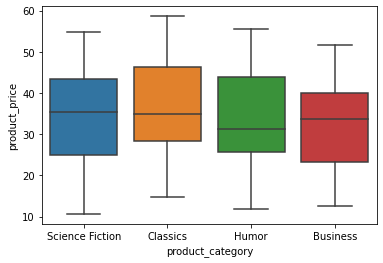

In [22]:
#boxplot category x price
ax1 = sns.boxplot(x="product_category", y="product_price", data=df_books)

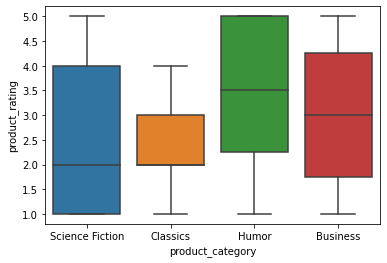

In [23]:
#boxplot category x rating
ax2= sns.boxplot(x="product_category", y="product_rating", data=df_books)